In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Weight': [2, 4, 5, 3, 6, 5, 7],
    'Price': [35, 60, 20, 50, 50, 55, 60]
}

In [3]:
dataset = pd.DataFrame(data)

In [4]:
print(dataset)

   Weight  Price
0       2     35
1       4     60
2       5     20
3       3     50
4       6     50
5       5     55
6       7     60


In [5]:
dataset.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [6]:
dataset.shape

(7, 2)

In [7]:
dataset.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


In [8]:
dataset.describe()

,Weight,Price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


Text(0, 0.5, 'Price')

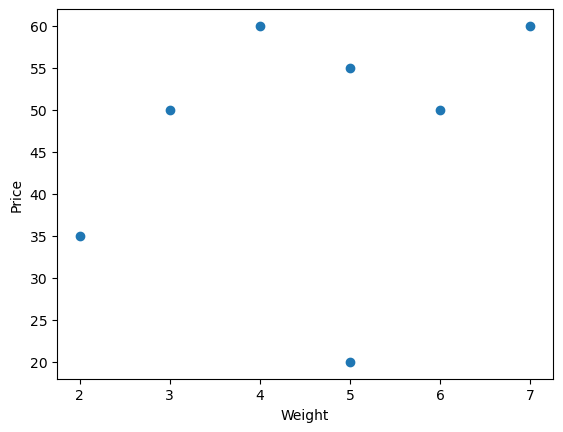

In [9]:
plt.scatter(dataset['Weight'] , dataset['Price'])
plt.xlabel('Weight')
plt.ylabel('Price')

In [10]:
x = dataset['Weight']
y = dataset['Price']

In [11]:
coefficient_m = ((dataset.shape[0] * (np.sum(x * y))) - ((np.sum(x)) * (np.sum(y)))) / ((dataset.shape[0] * (np.sum(x**2))) - (np.sum(x)**2))

In [12]:
coefficient_m

2.620967741935484

In [13]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [14]:
intercept_c = mean_y - (coefficient_m * mean_x)
intercept_c

35.16129032258065

In [15]:
weight_6 = (coefficient_m*6) + intercept_c
weight_6

50.88709677419355

In [16]:
weight_5 = (coefficient_m*5) + intercept_c
weight_5

48.266129032258064

In [17]:
model_pred = (coefficient_m*x) + intercept_c

In [18]:
model_pred

0    40.403226
1    45.645161
2    48.266129
3    43.024194
4    50.887097
5    48.266129
6    53.508065
Name: Weight, dtype: float64

In [19]:
dataset['model_pred'] = model_pred

In [20]:
dataset.head()

,Weight,Price,model_pred
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


Text(0, 0.5, 'Price')

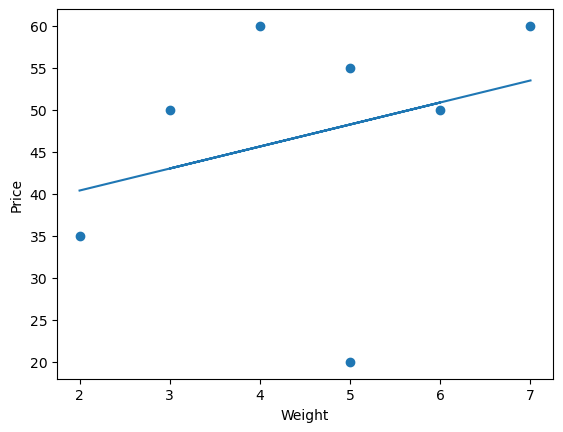

In [21]:
plt.plot(x, dataset['model_pred'])
plt.scatter(x , y)
plt.xlabel('Weight')
plt.ylabel('Price')

In [22]:
residuals = y - model_pred
residuals

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mse = mean_squared_error(y, dataset['model_pred']) 
mse

167.30990783410135

In [25]:
mae = mean_absolute_error(y, dataset['model_pred']) 
mae

9.87327188940092

In [26]:
import os
file_path = os.path.join(os.getcwd(), 'vegetable_prices.xlsx')

In [27]:
with pd.ExcelWriter('vegetable_prices.xlsx') as writer:
    dataset.to_excel(writer, sheet_name='Dataset', index=False)
    model_pred.to_excel(writer, sheet_name='Results', index=False)